# Explaratory Data Analysis

## 1. Data origin

<p>For our defined problem I have found very complementary dataset from <a href="https://storage.googleapis.com/openimages/web/index.html">Open Images V7</a>.</p>
<p> Open Images contains 600 classes of labaled objects contained in images for a machine learning purposes. From this huge data set I have extracted classes of weapon objects. Which will be used for our model as the training/validation/test dataset.  </p>
<p>To extract such subset of data from above dataset I have used open  source <a href="https://github.com/EscVM/OIDv4_ToolKit/tree/master">OIDv4 ToolKit</a> repository. Extracted classes: Rfile, Handgun, Knife, Shoutgan. All of these classes we will summarize as the Weapon class, to be detected from images using our model.</p>

In [1]:
import os
current_path = os.getcwd()
parent_path = os.path.abspath(os.path.join(current_path, os.pardir))
grandpa_path = os.path.abspath(os.path.join(parent_path, os.pardir))

In [2]:
grandpa_path

'D:\\WSB\\WSB_sem2\\UczenieMaszynowe\\WeaponDetectionPr'

In [3]:
# list of all colected images
img_dir_files_lst = os.listdir(grandpa_path + "\\data\\Dataset_YOLOformat\\Images")
# list of all labels
labels_dir_files_lst = os.listdir(grandpa_path +  "\\data\\Dataset_YOLOformat\\Label")

In [4]:
print(f"Number of Images = {len(img_dir_files_lst)} and Labels = {len(labels_dir_files_lst)}")

Number of Images = 2387 and Labels = 2387


## 2. Data formatting

<p>Downloaded data via OIDv4 ToolKit had labels' format:</p>
<p>name_of_the_class    left    top     right     bottom</p>

In [5]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

### Graphic representation of downloaded labels

#### 2.1 Pre-fromated labels

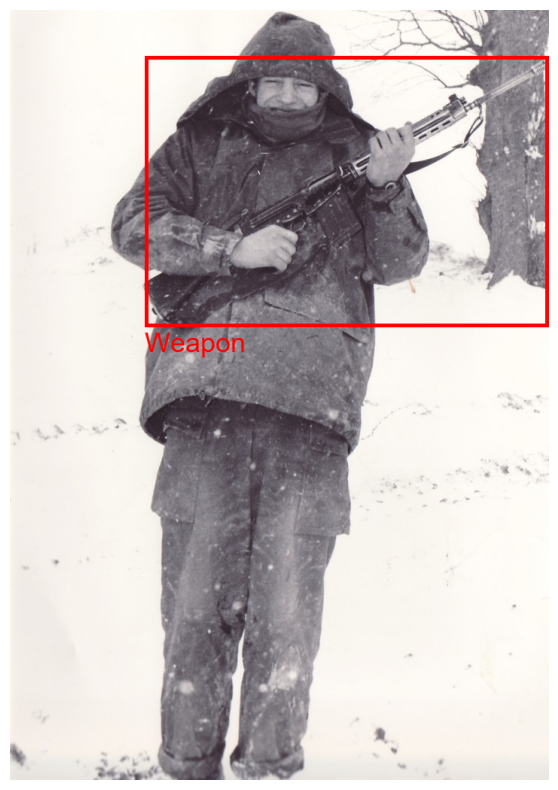

In [6]:
# Open the image
image = Image.open(grandpa_path + "\\data\\Dataset_YOLOformat\\Images" + "\\00df6076ebb98b03.jpg")

"""
with open(grandpa_path +  "\\data\\Dataset_YOLOformat\\Label"  +  "\\00df6076ebb98b03.txt", "r") as lbl:
    label = lbl.readlines()
# Create a drawing object
print(label)
"""
draw = ImageDraw.Draw(image)

# Define the coordinates of the rectangle (top-left and bottom-right)
top_left = (179.32005199999998, 61.44)
bottom_right = (715.359896, 421.76)

# Draw the rectangle on the image
color = (255, 0, 0)  # Green color
thickness = 5  # Thickness of the rectangle border
draw.rectangle([top_left, bottom_right], outline=color, width=thickness)

text = "Weapon"
font = ImageFont.truetype("arial.ttf", 36)  # You can specify the font and size

x = top_left[0]
y = bottom_right[1]

# Draw the text on the image
draw.text((x, y), text, fill="red", font=font)

# Since plt knows how to handle instance of the Image class, just input your loaded image to imshow method
plt.figure(figsize=(30, 10))  # Set the desired figure size (width, height)
plt.imshow(image)  # Plot the image
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

#### 2.2 Formated labels (YOLO format)

<p> To solve the weapon detection problem we have chosen YOLOv8 model. To allow model be  trainedo our dataset, labels require below format: </p>
<p>class_number[int] x_center[float] y_center[float] width[float] height[float]</p>
<p>As we can see, the diffrence is significant. YOLO model uses standarized data, instead using absolute x, y coordinates of the boxes it uses relative coordinates and values boudned beetwen $[0, 1]$ with respect to true image width-height. For example, x_center = x_center_absolute/image_width.</p>
<p>The esies way to understand above notation is by visualising an example. We will take the same picture as in 2.1 example.</p>

In [10]:
with open(grandpa_path +  "\\data\\Dataset_YOLOformat\\Label"  +  "\\00df6076ebb98b03.txt", "r") as lbl:
    label = lbl.readlines()
print(label)

['0 0.6247765 0.2359375 0.7486590000000002 0.351875\n']


In [15]:
class_weapon, x_center, y_center, x_width, y_height = label[0].split()
class_weapon, x_center, y_center, x_width, y_height = int(class_weapon), float(x_center), float(y_center), float(x_width), float(y_height)

In [19]:
print(f"Label values: class_weapon = {class_weapon}, x_center = {x_center}, y_center = {y_center}, x_width = {x_width}, y_height = {y_height}")

Label values: class_weapon = 0, x_center = 0.6247765, y_center = 0.2359375, x_width = 0.7486590000000002, y_height = 0.351875


In [46]:
x_center_absolute = x_center * image.width
y_center_absolute  = y_center * image.height
box_width  = x_width * image.width
box_height  = y_height * image.height

(447.339974, 241.6)


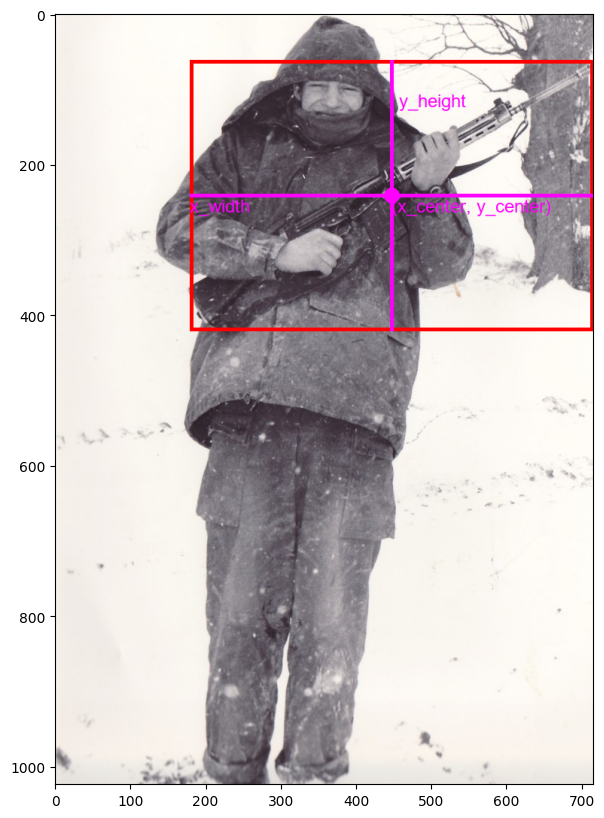

In [62]:
# Open the image
image = Image.open(grandpa_path + "\\data\\Dataset_YOLOformat\\Images" + "\\00df6076ebb98b03.jpg")

"""
with open(grandpa_path +  "\\data\\Dataset_YOLOformat\\Label"  +  "\\00df6076ebb98b03.txt", "r") as lbl:
    label = lbl.readlines()
# Create a drawing object
print(label)
"""
draw = ImageDraw.Draw(image)

# Define the coordinates of the rectangle (top-left and bottom-right)
top_left = (179.32005199999998, 61.44)
bottom_right = (715.359896, 421.76)

# Draw the rectangle on the image
color = (255, 0, 0)  # Green color
thickness = 5  # Thickness of the rectangle border
draw.rectangle([top_left, bottom_right], outline=color, width=thickness)

print((x_center_absolute, y_center_absolute))
dot_position = (x_center_absolute, y_center_absolute)
dot_radius = 10  # Increase the radius for a larger dot

# Calculate the coordinates of the bounding box for the circle
x1 = dot_position[0] - dot_radius
y1 = dot_position[1] - dot_radius
x2 = dot_position[0] + dot_radius
y2 = dot_position[1] + dot_radius

# Draw a filled circle (dot) on the image
draw.ellipse([x1, y1, x2, y2], fill="magenta")
draw.text(dot_position, "(x_center, y_center)", fill="magenta", font=ImageFont.truetype("arial.ttf", 24))

start_point1, end_point1 =  (x_center_absolute - box_width//2, y_center_absolute), (x_center_absolute + box_width//2, y_center_absolute)
start_point2, end_point2 =  (x_center_absolute, y_center_absolute - box_height//2), (x_center_absolute, y_center_absolute + box_height//2)
draw.line([start_point1, end_point1], fill="magenta", width=5)
draw.line([start_point2, end_point2], fill="magenta", width=5)

draw.text((x_center_absolute - box_width//2,y_center_absolute), "x_width", fill="magenta", font=ImageFont.truetype("arial.ttf", 24))
draw.text((x_center_absolute + 10,y_center_absolute - box_height//2 + 40), "y_height", fill="magenta", font=ImageFont.truetype("arial.ttf", 24))

# Since plt knows how to handle instance of the Image class, just input your loaded image to imshow method
plt.figure(figsize=(30, 10))  # Set the desired figure size (width, height)
plt.imshow(image)  # Plot the image
#plt.axis('off')  # Turn off axis labels and ticks
plt.show()